Bag of Words implementation for Sentiment analysis 💭


Once Jeff finished his coffee, he settled into his desk at Amazon's bustling headquarters in Seattle. As a data analyst at the world's largest online retailer, Jeff was accustomed to diving deep into the ocean of data generated by millions of transactions every day.

Today, Jeff had a new challenge on his plate. The marketing team wanted to gain insights into customer sentiment regarding their latest products. Specifically, they were interested in understanding whether customers were generally satisfied or dissatisfied with their purchases.

After pondering over various approaches, Jeff decided to task his team of interns with a hands-on assignment to implement Bag of Words (BoW) and Naive Bayes classification for sentiment analysis on Amazon reviews.

As an intern is your task to complete this challenge the best way possible to impress your boss and hopefully get a full time position at the company.  

The following notebook will guide you into how to create your BoW implementation for sentiment analysis and hopefully make jeff happy 🤭

As a first step we need to get all of our data ready

In [ ]:
#download train and test set
!gdown  https://drive.google.com/file/d/1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U/view?usp=sharing --fuzzy
!gdown  https://drive.google.com/file/d/1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp/view?usp=sharing --fuzzy

Downloading...
From (original): https://drive.google.com/uc?id=1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U
From (redirected): https://drive.google.com/uc?id=1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U&confirm=t&uuid=b28a08d5-c53d-4db3-8c3a-13bb8cb127d9
To: /content/train.ft.zip
100% 615M/615M [00:08<00:00, 75.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp
From (redirected): https://drive.google.com/uc?id=1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp&confirm=t&uuid=32ffd1e1-7c12-4cf0-8787-ca50c7bad54f
To: /content/test.ft.zip
100% 70.3M/70.3M [00:00<00:00, 90.7MB/s]


In [ ]:
#unzip
!unzip train.ft.zip
!unzip test.ft.zip

Archive:  train.ft.zip
  inflating: train.ft.txt            
Archive:  test.ft.zip
  inflating: test.ft.txt             


Our txts has the following format


```
__label__#  This is a review ....

```

As you see the first word refers to the label, `__label__1` corresponds to 1- and
2-star reviews(negative sentiment) and `__label__2` corresponds to to 4- and 5-star reviews (positive sentiment).

Normally reviews are very messy including words with incorrect spelling, different formats and a lot of words that do not add any value to our classification. Let's create a method to clean them

In [ ]:
#import nltk libray, you are going to need this later
import nltk
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
import re
def preprocess_text(text):
  """ Method to clean reviews from noise and standarize text across the different classes.
      The preprocessing includes converting to lowercase, removing punctuation, and removing stopwords.
  Arguments
  ---------
  text : String
     Text to clean
  Returns
  -------
  text : String
      Cleaned text
  """
  stop_words = set(stopwords.words('english'))

  # Make everything lowercase
  text = text.lower()

  # Remove newline characters
  text = text.replace("\n", " ")

  # Remove punctuation
  text = re.sub(r'[^\w\s]', ' ', text)

  # Remove all numbers
  text = ''.join([char for char in text if not char.isdigit()])

  # Remove stopwords
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

It's also useful to have our data organized and ready to access! An great library for this is [pandas](https://pandas.pydata.org/). In the folowing code cell you will create a dataframe containing all the data provided in the training document. Please be patient this code cell can take up to 10 min (is a big dataset!)

In [ ]:
import pandas as pd

def create_dataframe(path_to_file):
    """Creates dataframe of reviews and labels
    Arguments
    ---------
    path_to_file : str
        Path to file to read
    Returns
    -------
    df : pandas DataFrame
        Dataframe of reviews and labels
    """
    df = {}
    index = 0

    # Open the file and process each line
    with open(path_to_file, 'r') as f:
        for line in f:
            # Strip leading/trailing spaces and split the line into label and text
            #example: "   __label__1 This is a review    \n" then "__label__1 This is a review" then "parts = ['__label__1', 'This is a review']"
            parts = line.strip().split(' ', 1)  # Split by the first space only

            # Check that the line has both label and review text
            if len(parts) < 2:
                continue  # Skip lines that do not have the expected format

            label_text = parts[0]  # The label (e.g., __label__1 or __label__2)
            text = parts[1]  # The review text

            # Convert label_text to a numeric value (0 for negative, 1 for positive)
            if label_text == '__label__1':
                label = 0  # Negative sentiment
            elif label_text == '__label__2':
                label = 1  # Positive sentiment
            else:
                continue  # Skip if the label is not valid

            # Preprocess the text using the preprocess_text function
            text = preprocess_text(text)

            # Store the label and text in the dictionary
            df[index] = {'label': label, 'text': text}
            index += 1

    # Convert the dictionary to a pandas DataFrame and return it
    return pd.DataFrame.from_dict(df, orient='index')

df_train= create_dataframe('train.ft.txt')
df_test= create_dataframe('test.ft.txt')

In [ ]:
def vocab_dictionary(df):
  """ Creates dictionary of frequencies based on a dataset of reviews
  Arguments
  ---------
  dataset : list of tuples
      list of tuples of the form (label, text)
  Returns
  -------
  vocab_dict : dictonary
      Dictionary of words and their frequencies with the format {word: frequency}
  """

  vocab= {} #create empty dictionary
  # Iterate through the rows of the DataFrame
  for index, row in df.iterrows():
          text = row['text']  # Access the 'text' column of the row

          # Split the text into individual words
          words = text.split()

          # Count the frequency of each word
          for word in words:
              if word in vocab:
                  vocab[word] += 1 # If the word is already in the dictionary, increment its count
              else:
                  vocab[word] = 1 # If the word is not in the dictionary, add it with an initial count of 1

  return vocab

In [ ]:



full_vocab=vocab_dictionary(df_train)
positive_vocab = vocab_dictionary(df_train[df_train['label']==1]) #We create a positive vocab to keep track of words in positive reviews. This will come in handy later
negative_vocab = vocab_dictionary(df_train[df_train['label']==0]) #We create a negative vocab to keep track of words in negative reviews. This will come in handy later

In [ ]:
len(full_vocab)

889508

Let's take a look to out training vocabulary, in the following cell create a sorted dictionary by frequency from most frequent to less frequent tokens

In [ ]:
# Sort the vocabulary by frequency from high to low
vocab_sorted = dict(sorted(full_vocab.items(), key=lambda item: item[1], reverse=True))
#The key parameter is used to specify how the items should be sorted. In this case, the code uses a lambda function to sort the items based on the second element (item[1]) of each tuple, which is the frequency.
#By default, it sorts in ascending order, but with the reverse=True argument, it sorts in descending order

In [ ]:
from itertools import islice

# Take the first 30 tokens from the sorted vocabulary
first_tokens = dict(islice(vocab_sorted.items(), 30))

In order to see Zip's law first hand, let's plot the first 30 most frequent words of each vocabulary

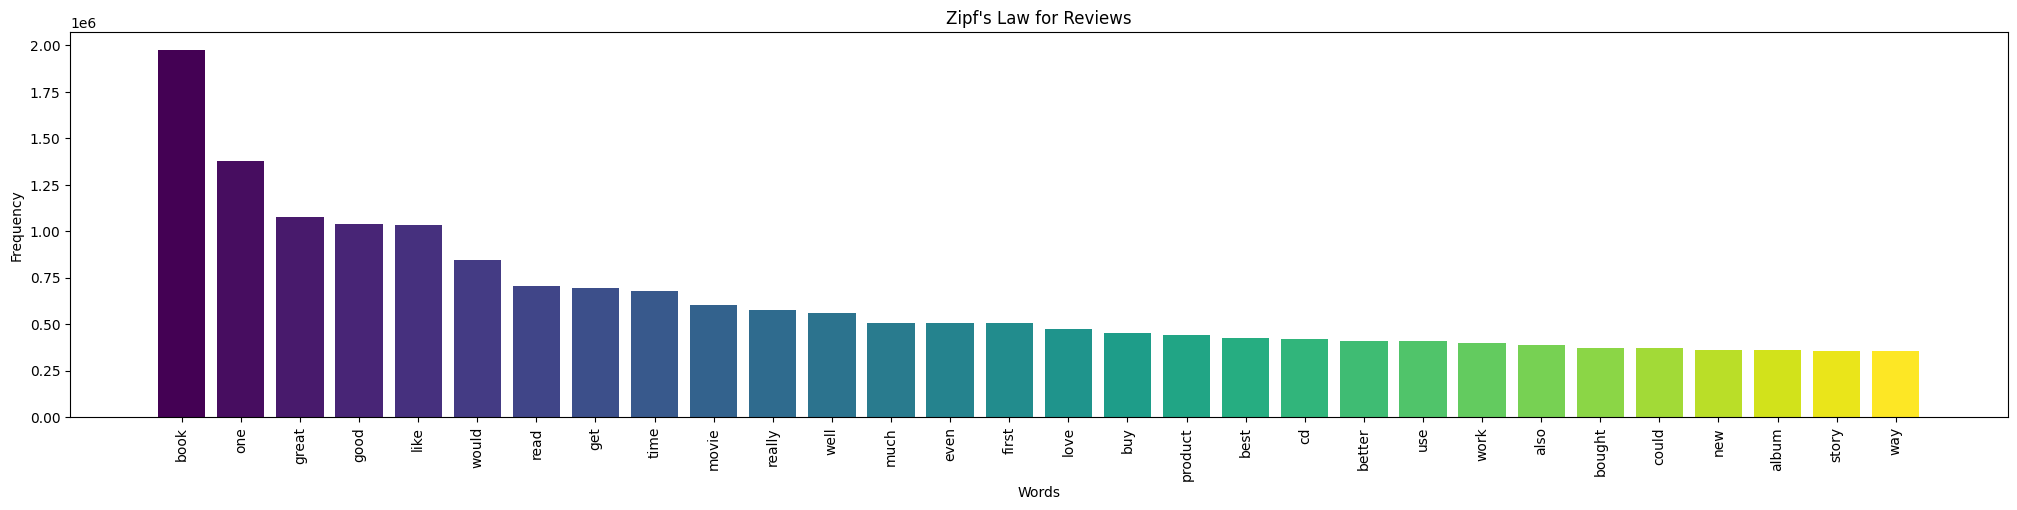

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#TODO: Create bar chart of the 30 most frequent words in positive reviews with appropriate title and axis labels
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(first_tokens)))  # Generate colors for each bar

# Plot the first 30 most frequent words in positive reviews
fig = plt.figure(figsize=(25, 5))
plt.bar(first_tokens.keys(), first_tokens.values(), color=colors)
plt.title("Zipf's Law for Reviews")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


Let's check the size of our vocabulary

In [ ]:
print('Vocabulary size:',len(full_vocab))

Vocabulary size: 889508


Now that our reviews are "clean" let's start the real work. Naive bayes includes three important components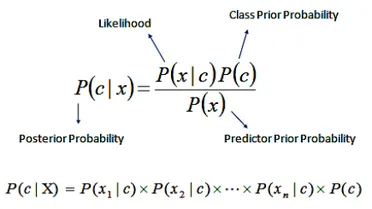

We need to calculate two things for the posterior probability: the likelihood and the class prior probability (since is naive bayes we ignore the predictor prior probability)

Let's first calculate the class prior probability. This meaning the probability a review is positive or negative without taking into account the content.

In [ ]:
import pandas as pd


positive_prior = df_train[df_train['label'] == 1].shape[0] / df_train.shape[0]
negative_prior = df_train[df_train['label'] == 0].shape[0] / df_train.shape[0]

print("Positive Prior Probability:", positive_prior)
print("Negative Prior Probability:", negative_prior)


Positive Prior Probability: 0.5
Negative Prior Probability: 0.5


In [ ]:
# Calculate the number of positive reviews
positive_reviews = df_train[df_train['label'] == 1].shape[0]

# Calculate the number of negative reviews
negative_reviews = df_train[df_train['label'] == 0].shape[0]

In [ ]:
print(positive_reviews)
print(negative_reviews)

1800000
1800000


Now let's create a method to calculate the log likelihood of each word in our vocabulary

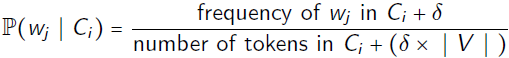

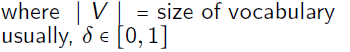

In [ ]:
import math
SMOOTHING_FACTOR = 0.2
def calculate_log_likelihood(vocab, positive_vocab, negative_vocab, smoothing_factor=SMOOTHING_FACTOR):
  """ Calculates log likelihood of words belonging to a positive or negative review given a dataset and vocabulary
  Arguments
  ---------
  dataset : list of tuples
      List of positive or negative reviews with their respective label (label, text)
  vocab : dictionary
      Vocabulary of words in the dataset with their respective frequencies
  Returns
  -------
  likelihood : dictionary of dictionaries
      Dictionary of words and their positive and negative log likelihood with format {word: {'positive': log_likelihood, 'negative': log_likelihood}}
  """
    # Dictionary to store log likelihoods of each word for positive and negative reviews
  likelihood = {}

  # Calculate total number of word occurrences in positive and negative vocabularies
  number_instances_positive = sum(positive_vocab.values())  # Total word count in positive reviews
  number_instances_negative = sum(negative_vocab.values())  # Total word count in negative reviews

  # Total number of unique words in the entire vocabulary (positive + negative)
  number_types = len(vocab)  # This is the size of the full vocabulary

  # Iterate through each word in the full vocabulary
  for word, _ in vocab.items():
      # Get the count of the word in positive and negative vocabularies (default 0 if word not found)
      word_positive_count = positive_vocab.get(word, 0)  # Frequency in positive reviews
      word_negative_count = negative_vocab.get(word, 0)  # Frequency in negative reviews

      # Calculate positive log likelihood with smoothing
      positive_log_likelihood = math.log(
          (word_positive_count + smoothing_factor) /
          (number_instances_positive + smoothing_factor * number_types)
      )

      # Calculate negative log likelihood with smoothing
      negative_log_likelihood = math.log(
          (word_negative_count + smoothing_factor) /
          (number_instances_negative + smoothing_factor * number_types)
      )

      # Create a dictionary with the log likelihoods of each word for positive and negative reviews
      likelihood[word] = {
          'positive': positive_log_likelihood,  # Log likelihood for positive reviews
          'negative': negative_log_likelihood   # Log likelihood for negative reviews
      }

  return likelihood

In [ ]:


likelihood = calculate_log_likelihood(full_vocab,positive_vocab,negative_vocab,smoothing_factor)


Let's make sure we don't have any bugs till now

In [ ]:
# Ensure the sum of exponentials of positive log likelihoods is close to 1
assert math.isclose(sum([math.exp(likelihood[word]['positive']) for word in likelihood]), 1, rel_tol=1e-9), "There is probably a bug calculating the positive log likelihood"

# Ensure the sum of exponentials of negative log likelihoods is close to 1
assert math.isclose(sum([math.exp(likelihood[word]['negative']) for word in likelihood]), 1, rel_tol=1e-9), "There is probably a bug calculating the negative log likelihood"

print("Great job! Keep going!")


Great job! Keep going!


image.png

Now the most essential function in our program, the method to actually classify unseen reviews.

In [ ]:
import math

def classify_review(text, likelihood, positive_prior, negative_prior):
    """
    Calculates log scores for a new text given some prior probabilities and likelihoods.

    Arguments
    ---------
    text : string
        Text to classify
    likelihood : dictionary
        Dictionary of words and their log likelihood for both positive and negative reviews
    positive_prior : float
        Prior probability of a review being positive (in log form)
    negative_prior : float
        Prior probability of a review being negative (in log form)

    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text ('positive' or 'negative')
    sentiment_scores : dictionary
        Dictionary with the log scores for positive and negative sentiments
    """

    # Preprocess the input review
    tokens = preprocess_text(text).split()  # Tokenize the preprocessed text

    # Start with the log prior probabilities
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Calculate the log scores for positive and negative classes
    for token in tokens:
        if token in likelihood:  # If the word is in the vocabulary
            log_score_positive += likelihood[token]['positive']
            log_score_negative += likelihood[token]['negative']
        else:
            # If the word is unseen (not in vocabulary), we can ignore or handle it (smoothing could be done here)
            pass  # For now, we ignore unseen tokens

    # Store the sentiment scores in a dictionary
    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }

    # Determine the predicted sentiment (the one with the highest score)
    if log_score_positive > log_score_negative:
        predicted_sentiment = 'positive'
    else:
        predicted_sentiment = 'negative'

    return predicted_sentiment, sentiment_scores


In [ ]:
text="This hair dryer is terribly bad, it doesn't work at all"
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of negative

negative
{'positive': -42.38935109032712, 'negative': -38.91578270960825}


In [ ]:
text='This product was amazing I would buy it again'
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

positive
{'positive': -24.966127629008128, 'negative': -25.287002685087774}


For each token

In [ ]:
import math

def classify_review_token(text, likelihood, positive_prior, negative_prior):
    """
    Calculates log scores for a new text given some prior probabilities and likelihoods.

    Arguments
    ---------
    text : string
        Text to classify
    likelihood : dictionary
        Dictionary of words and their log likelihood for both positive and negative reviews
    positive_prior : float
        Prior probability of a review being positive (in log form)
    negative_prior : float
        Prior probability of a review being negative (in log form)

    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text ('positive' or 'negative')
    sentiment_scores : dictionary
        Dictionary with the log scores for positive and negative sentiments
    """

    # Tokenize the input text (split into words)
    tokens = text.split()  # This splits the text by spaces. Adjust the tokenization method as needed.

    # Start with the log prior probabilities
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Print the log prior probabilities
    print(f"Initial log score (prior): Positive: {log_score_positive:.3f}, Negative: {log_score_negative:.3f}")

    # Calculate the log scores for positive and negative classes
    for token in tokens:
        if token in likelihood:  # If the word is in the vocabulary
            positive_contribution = likelihood[token]['positive']
            negative_contribution = likelihood[token]['negative']

            # Print the token contributions
            print(f"Token '{token}' contributes -> Positive: {positive_contribution:.3f}, Negative: {negative_contribution:.3f}")

            log_score_positive += positive_contribution
            log_score_negative += negative_contribution
        else:
            # If the word is unseen (not in vocabulary), we can ignore or handle it (smoothing could be done here)
            print(f"Token '{token}' is unseen and ignored.")
            pass  # For now, we ignore unseen tokens

    # Store the sentiment scores in a dictionary
    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }

    # Determine the predicted sentiment (the one with the highest score)
    if log_score_positive > log_score_negative:
        predicted_sentiment = 'positive'
    else:
        predicted_sentiment = 'negative'

    return predicted_sentiment, sentiment_scores


In [ ]:
text='This product was amazing I would buy it again'
predicted_sentiment, sentiment_scores = classify_review_token(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive


Initial log score (prior): Positive: -0.693, Negative: -0.693
Token 'This' is unseen and ignored.
Token 'product' contributes -> Positive: -6.073, Negative: -5.558
Token 'was' is unseen and ignored.
Token 'amazing' contributes -> Positive: -6.768, Negative: -8.559
Token 'I' is unseen and ignored.
Token 'would' contributes -> Positive: -5.376, Negative: -4.944
Token 'buy' contributes -> Positive: -6.056, Negative: -5.532
Token 'it' is unseen and ignored.
Token 'again' is unseen and ignored.
positive
{'positive': -24.966127629008128, 'negative': -25.287002685087774}


## Let's test our model

In all machine learning workflows is essential to test how well our model does with unseen data. Let's try testing the model with the provided test dataframe we created at the beggining, you remember?

In [ ]:
# Declare the performance metrics globally before the function (only once)
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

def test(df_test, likelihood, positive_prior, negative_prior):
    # Use the global variables without resetting them
    global true_negatives, false_negatives, true_positives, false_positives

    # Iterate over the test dataset
    for index, review in df_test.iterrows():
        true_label = review['label']
        text = review['text']

        # Classify the review using the Naive Bayes classifier
        predicted_sentiment, _ = classify_review(text, likelihood, positive_prior, negative_prior)

        # Convert predicted sentiment to the same format as the label (1 for 'positive', 0 for 'negative')
        predicted_label = 1 if predicted_sentiment == 'positive' else 0

        # Compare true label with predicted label and update metrics
        if predicted_label == 1 and true_label == 1:
            true_positives += 1  # TP
        elif predicted_label == 0 and true_label == 0:
            true_negatives += 1  # TN
        elif predicted_label == 1 and true_label == 0:
            false_positives += 1  # FP
        elif predicted_label == 0 and true_label == 1:
            false_negatives += 1  # FN

    # Calculate Precision, Recall, and F1-Score after processing all the reviews
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

In [ ]:


# smoothing 0.2
Precision_smoothing_0_2, Recall_smoothing_0_2, F1_Score_smoothing_0_2 = test(df_test, likelihood, positive_prior, negative_prior)

# Print the results
print("Precision (Smoothing 0.2): ", Precision_smoothing_0_2)
print("Recall (Smoothing 0.2): ", Recall_smoothing_0_2)
print("F1 Score (Smoothing 0.2): ", F1_Score_smoothing_0_2)



Precision (Smoothing 0.2):  0.8535228865728043
Recall (Smoothing 0.2):  0.840225
F1 Score (Smoothing 0.2):  0.8468217413652352


## Let's Experiment

Document any changes after this cell

Now it's your time to experiment to impress Jeff:

1.   modify the smoothing factor (use three different values)
1.   try using the raw texts withour any pre-processing techniques

Analyse and report how these modifications affect the predictions of your model(see more in handout)

# **1- modify the smoothing factor (use three different values)**

In [ ]:
def evaluate_with_smoothing_factors(smoothing_factors, df_test, positive_prior, negative_prior):
    for smoothing_factor in smoothing_factors:
        print(f"Evaluating with Smoothing Factor: {smoothing_factor}")

        # Calculate the likelihood with the current smoothing factor
        likelihood = calculate_log_likelihood(full_vocab, positive_vocab, negative_vocab, smoothing_factor)

        # Evaluate precision, recall, and F1 score using the test function
        precision, recall, f1_score = test(df_test, likelihood, positive_prior, negative_prior)

        # Dynamically create variables for precision, recall, and F1 score for each smoothing factor
        precision_var = f"Precision_smoothing_{str(smoothing_factor).replace('.', '_')}"
        recall_var = f"Recall_smoothing_{str(smoothing_factor).replace('.', '_')}"
        f1_var = f"F1_Score_smoothing_{str(smoothing_factor).replace('.', '_')}"

        # Save the metrics in dynamically created variables using globals()
        globals()[precision_var] = precision
        globals()[recall_var] = recall
        globals()[f1_var] = f1_score

# List of smoothing factors to test
smoothing_factors = [0.1, 0.3, 0.5]

# Run evaluation with different smoothing factors
evaluate_with_smoothing_factors(smoothing_factors, df_test, positive_prior, negative_prior)

# Now, you can access the dynamically created variables for each smoothing factor

# For smoothing factor 0.1
print("Precision_smoothing_0_1: ", Precision_smoothing_0_1)
print("Recall_smoothing_0_1: ", Recall_smoothing_0_1)
print("F1_Score_smoothing_0_1: ", F1_Score_smoothing_0_1)

# For smoothing factor 0.3
print("Precision_smoothing_0_3: ", Precision_smoothing_0_3)
print("Recall_smoothing_0_3: ", Recall_smoothing_0_3)
print("F1_Score_smoothing_0_3: ", F1_Score_smoothing_0_3)

# For smoothing factor 0.5
print("Precision_smoothing_0_5: ", Precision_smoothing_0_5)
print("Recall_smoothing_0_5: ", Recall_smoothing_0_5)
print("F1_Score_smoothing_0_5: ", F1_Score_smoothing_0_5)

Evaluating with Smoothing Factor: 0.1
Evaluating with Smoothing Factor: 0.3
Evaluating with Smoothing Factor: 0.5
Precision_smoothing_0_1:  0.8532305778093775
Recall_smoothing_0_1:  0.8400375
F1_Score_smoothing_0_1:  0.8465826420513596
Precision_smoothing_0_3:  0.853480182178352
Recall_smoothing_0_3:  0.8401516666666666
F1_Score_smoothing_0_3:  0.8467634781586219
Precision_smoothing_0_5:  0.853730839037116
Recall_smoothing_0_5:  0.84022375
F1_Score_smoothing_0_5:  0.8469234437673521


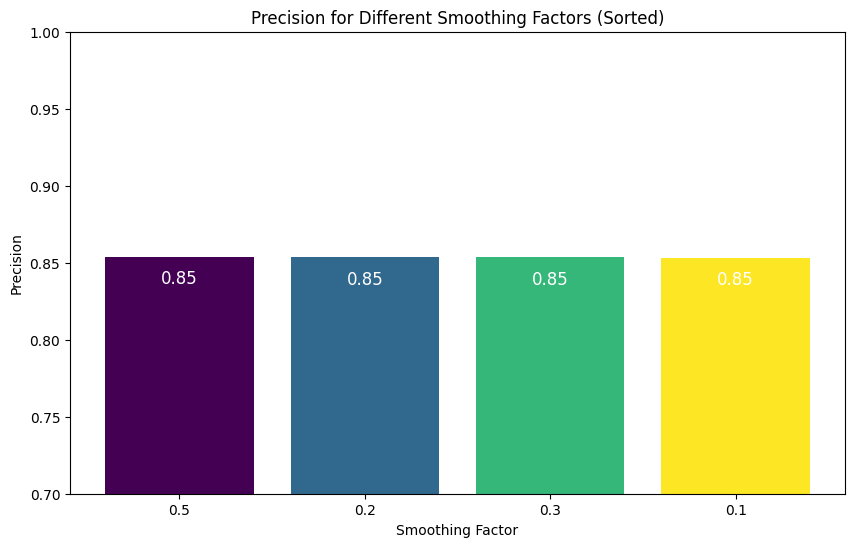

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gather precision metrics and smoothing factors
smoothing_factors = [0.1, 0.2, 0.3, 0.5]
precision_values = [
    Precision_smoothing_0_1,
    Precision_smoothing_0_2,
    Precision_smoothing_0_3,
    Precision_smoothing_0_5
]

# Zip the smoothing factors and precision values, then sort them by precision in descending order
sorted_data = sorted(zip(precision_values, smoothing_factors), reverse=True)

# Unzip the sorted data back into two lists
sorted_precision, sorted_factors = zip(*sorted_data)

# Create a color gradient for the bars (optional)
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_factors)))

# Create a bar chart for the sorted precision values
plt.figure(figsize=(10, 6))
bars = plt.bar([str(sf) for sf in sorted_factors], sorted_precision, color=colors)

# Add precision values on top of each bar
for bar, value in zip(bars, sorted_precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, f'{value:.2f}',
             ha='center', va='bottom', fontsize=12, color='white')

# Set labels and title
plt.xlabel('Smoothing Factor')
plt.ylabel('Precision')
plt.title('Precision for Different Smoothing Factors (Sorted)')
plt.ylim([0.7, 1.0])  # Adjust the Y-axis range as needed
plt.show()



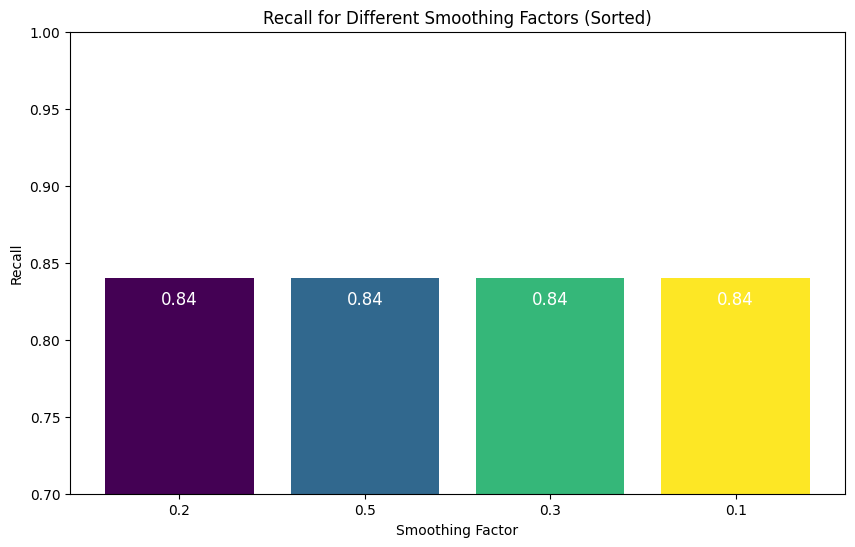

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gather recall metrics and smoothing factors
smoothing_factors = [0.1, 0.2, 0.3, 0.5]
recall_values = [
    Recall_smoothing_0_1,
    Recall_smoothing_0_2,
    Recall_smoothing_0_3,
    Recall_smoothing_0_5
]

# Zip the smoothing factors and recall values, then sort them by recall in descending order
sorted_data = sorted(zip(recall_values, smoothing_factors), reverse=True)

# Unzip the sorted data back into two lists
sorted_recall, sorted_factors = zip(*sorted_data)

# Create a color gradient for the bars (optional)
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_factors)))

# Create a bar chart for the sorted recall values
plt.figure(figsize=(10, 6))
bars = plt.bar([str(sf) for sf in sorted_factors], sorted_recall, color=colors)

# Add recall values on top of each bar
for bar, value in zip(bars, sorted_recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, f'{value:.2f}',
             ha='center', va='bottom', fontsize=12, color='white')

# Set labels and title
plt.xlabel('Smoothing Factor')
plt.ylabel('Recall')
plt.title('Recall for Different Smoothing Factors (Sorted)')
plt.ylim([0.7, 1.0])  # Adjust the Y-axis range as needed
plt.show()


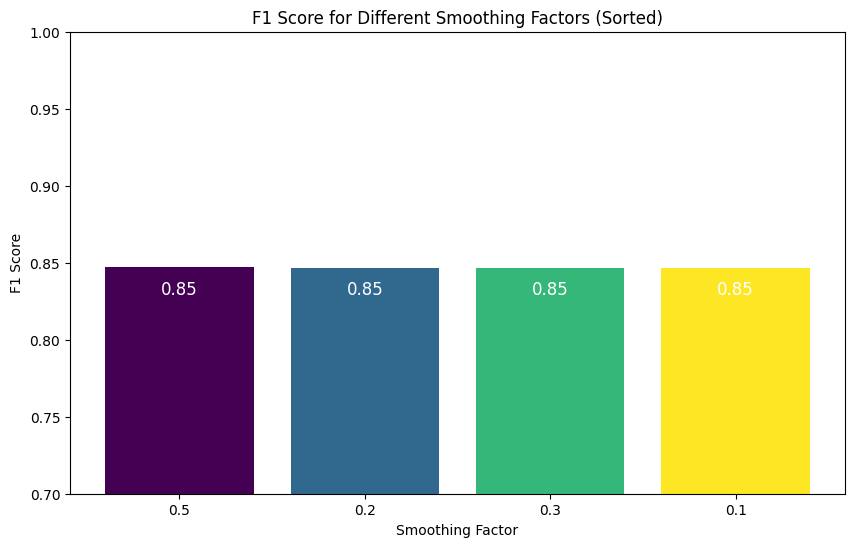

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gather F1 score metrics and smoothing factors
smoothing_factors = [0.1, 0.2, 0.3, 0.5]
f1_score_values = [
    F1_Score_smoothing_0_1,
    F1_Score_smoothing_0_2,
    F1_Score_smoothing_0_3,
    F1_Score_smoothing_0_5
]

# Zip the smoothing factors and F1 score values, then sort them by F1 score in descending order
sorted_data = sorted(zip(f1_score_values, smoothing_factors), reverse=True)

# Unzip the sorted data back into two lists
sorted_f1_score, sorted_factors = zip(*sorted_data)

# Create a color gradient for the bars (optional)
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_factors)))

# Create a bar chart for the sorted F1 score values
plt.figure(figsize=(10, 6))
bars = plt.bar([str(sf) for sf in sorted_factors], sorted_f1_score, color=colors)

# Add F1 score values on top of each bar
for bar, value in zip(bars, sorted_f1_score):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, f'{value:.2f}',
             ha='center', va='bottom', fontsize=12, color='white')

# Set labels and title
plt.xlabel('Smoothing Factor')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Smoothing Factors (Sorted)')
plt.ylim([0.7, 1.0])  # Adjust the Y-axis range as needed
plt.show()


In [ ]:
import pandas as pd

# Create a table of precision, recall, and F1 score for each smoothing factor
table_data = {
    'Smoothing Factor': smoothing_factors,
    'Precision': [
        Precision_smoothing_0_1,
        Precision_smoothing_0_2,
        Precision_smoothing_0_3,
        Precision_smoothing_0_5
    ],
    'Recall': [
        Recall_smoothing_0_1,
        Recall_smoothing_0_2,
        Recall_smoothing_0_3,
        Recall_smoothing_0_5
    ],
    'F1 Score': [
        F1_Score_smoothing_0_1,
        F1_Score_smoothing_0_2,
        F1_Score_smoothing_0_3,
        F1_Score_smoothing_0_5
    ]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(table_data)

# Sort the DataFrame by 'F1 Score' in descending order
df_sorted = df.sort_values(by='F1 Score', ascending=False)

# Display the sorted table
print(df_sorted)

# Optionally, save the sorted DataFrame to a CSV file
df_sorted.to_csv('sorted_smoothing_factors_metrics.csv', index=False)

   Smoothing Factor  Precision    Recall  F1 Score
3               0.5   0.853731  0.840224  0.846923
1               0.2   0.853523  0.840225  0.846822
2               0.3   0.853480  0.840152  0.846763
0               0.1   0.853231  0.840037  0.846583


# **2- try using the raw texts withour any pre-processing techniques**

Modify create_dataframe to skip text preprocessing

In [ ]:
def create_dataframe_raw(path_to_file):
    """Creates dataframe of reviews and labels without preprocessing.
    Arguments
    ---------
    path_to_file : str
        Path to file to read
    Returns
    -------
    df : pandas DataFrame
        Dataframe of reviews and labels
    """
    df = {}
    index = 0

    # Open the file and process each line
    with open(path_to_file, 'r') as f:
        for line in f:
            # Strip leading/trailing spaces and split the line into label and text
            parts = line.strip().split(' ', 1)  # Split by the first space only

            # Check that the line has both label and review text
            if len(parts) < 2:
                continue  # Skip lines that do not have the expected format

            label_text = parts[0]  # The label (e.g., __label__1 or __label__2)
            text = parts[1]  # The review text (raw, without preprocessing)

            # Convert label_text to a numeric value (0 for negative, 1 for positive)
            if label_text == '__label__1':
                label = 0  # Negative sentiment
            elif label_text == '__label__2':
                label = 1  # Positive sentiment
            else:
                continue  # Skip if the label is not valid

            # Use the raw text directly without preprocessing
            df[index] = {'label': label, 'text': text}
            index += 1

    # Convert the dictionary to a pandas DataFrame and return it
    return pd.DataFrame.from_dict(df, orient='index')


Load data

In [ ]:
import pandas as pd
# Load the training and test datasets without preprocessing
df_train_raw = create_dataframe_raw('train.ft.txt')
df_test_raw = create_dataframe_raw('test.ft.txt')

In [ ]:
def vocab_dictionary(df):
  """ Creates dictionary of frequencies based on a dataset of reviews
  Arguments
  ---------
  dataset : list of tuples
      list of tuples of the form (label, text)
  Returns
  -------
  vocab_dict : dictonary
      Dictionary of words and their frequencies with the format {word: frequency}
  """

  vocab= {} #create empty dictionary
  # Iterate through the rows of the DataFrame
  for index, row in df.iterrows():
          text = row['text']  # Access the 'text' column of the row

          # Split the text into individual words
          words = text.split()

          # Count the frequency of each word
          for word in words:
              if word in vocab:
                  vocab[word] += 1 # If the word is already in the dictionary, increment its count
              else:
                  vocab[word] = 1 # If the word is not in the dictionary, add it with an initial count of 1

  return vocab

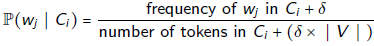

In [ ]:
import math
SMOOTHING_FACTOR = 0.2
def calculate_log_likelihood(vocab, positive_vocab, negative_vocab, smoothing_factor=SMOOTHING_FACTOR):
  """ Calculates log likelihood of words belonging to a positive or negative review given a dataset and vocabulary
  Arguments
  ---------
  dataset : list of tuples
      List of positive or negative reviews with their respective label (label, text)
  vocab : dictionary
      Vocabulary of words in the dataset with their respective frequencies
  Returns
  -------
  likelihood : dictionary of dictionaries
      Dictionary of words and their positive and negative log likelihood with format {word: {'positive': log_likelihood, 'negative': log_likelihood}}
  """
    # Dictionary to store log likelihoods of each word for positive and negative reviews
  likelihood = {}

  # Calculate total number of word occurrences in positive and negative vocabularies
  number_instances_positive = sum(positive_vocab.values())  # Total word count in positive reviews
  number_instances_negative = sum(negative_vocab.values())  # Total word count in negative reviews

  # Total number of unique words in the entire vocabulary (positive + negative)
  number_types = len(vocab)  # This is the size of the full vocabulary

  # Iterate through each word in the full vocabulary
  for word, _ in vocab.items():
      # Get the count of the word in positive and negative vocabularies
      word_positive_count = positive_vocab.get(word, 0)  # Frequency in positive reviews
      word_negative_count = negative_vocab.get(word, 0)  # Frequency in negative reviews

      # Calculate positive log likelihood with smoothing
      positive_log_likelihood = math.log(
          (word_positive_count + smoothing_factor) /
          (number_instances_positive + smoothing_factor * number_types)
      )

      # Calculate negative log likelihood with smoothing
      negative_log_likelihood = math.log(
          (word_negative_count + smoothing_factor) /
          (number_instances_negative + smoothing_factor * number_types)
      )

      # Create a dictionary with the log likelihoods of each word for positive and negative reviews
      likelihood[word] = {
          'positive': positive_log_likelihood,  # Log likelihood for positive reviews
          'negative': negative_log_likelihood   # Log likelihood for negative reviews
      }

  return likelihood

image.png

In [ ]:
import math

def classify_review_raw(text, likelihood, positive_prior, negative_prior):
    """
    Calculates log scores for a new text given some prior probabilities and likelihoods.

    Arguments
    ---------
    text : string
        Text to classify
    likelihood : dictionary
        Dictionary of words and their log likelihood for both positive and negative reviews
    positive_prior : float
        Prior probability of a review being positive (in log form)
    negative_prior : float
        Prior probability of a review being negative (in log form)

    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text ('positive' or 'negative')
    sentiment_scores : dictionary
        Dictionary with the log scores for positive and negative sentiments
    """

    # Tokenize the input text (split into words)
    tokens = text.split()  # This splits the text by spaces. Adjust the tokenization method as needed.

    # Start with the log prior probabilities
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Calculate the log scores for positive and negative classes
    for token in tokens:
        if token in likelihood:  # If the word is in the vocabulary
            log_score_positive += likelihood[token]['positive']
            log_score_negative += likelihood[token]['negative']
        else:
            # If the word is unseen (not in vocabulary), we can ignore or handle it (smoothing could be done here)
            pass  # For now, we ignore unseen tokens

    # Store the sentiment scores in a dictionary
    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }

    # Determine the predicted sentiment (the one with the highest score)
    if log_score_positive > log_score_negative:
        predicted_sentiment = 'positive'
    else:
        predicted_sentiment = 'negative'

    return predicted_sentiment, sentiment_scores


In [ ]:

# Calculate the vocabulary dictionaries using raw texts
full_vocab_raw = vocab_dictionary(df_train_raw)
positive_vocab_raw = vocab_dictionary(df_train_raw[df_train_raw['label'] == 1])
negative_vocab_raw = vocab_dictionary(df_train_raw[df_train_raw['label'] == 0])

# Calculate priors
positive_prior = df_train_raw[df_train_raw['label'] == 1].shape[0] / df_train_raw.shape[0]
negative_prior = df_train_raw[df_train_raw['label'] == 0].shape[0] / df_train_raw.shape[0]

# Calculate likelihoods using raw text
likelihood_raw = calculate_log_likelihood(full_vocab_raw, positive_vocab_raw, negative_vocab_raw)

# Classify test reviews using the raw text model
for index, review in df_test_raw.iterrows():
    true_label = review['label']
    text = review['text']

    predicted_sentiment, _ = classify_review_raw(text, likelihood_raw, positive_prior, negative_prior)



In [ ]:
# Sort the vocabulary by frequency from high to low
vocab_sorted_raw = dict(sorted(full_vocab_raw.items(), key=lambda item: item[1], reverse=True))
#The key parameter is used to specify how the items should be sorted. In this case, the code uses a lambda function to sort the items based on the second element (item[1]) of each tuple, which is the frequency.
#By default, it sorts in ascending order, but with the reverse=True argument, it sorts in descending order

In [ ]:
print('Vocabulary size:',len(full_vocab_raw))

Vocabulary size: 5165172


In [ ]:
from itertools import islice

# Take the first 30 tokens from the sorted vocabulary
first_tokens_raw = dict(islice(vocab_sorted_raw.items(), 30))

In order to see Zip's law first hand, let's plot the first 30 most frequent words of each vocabulary

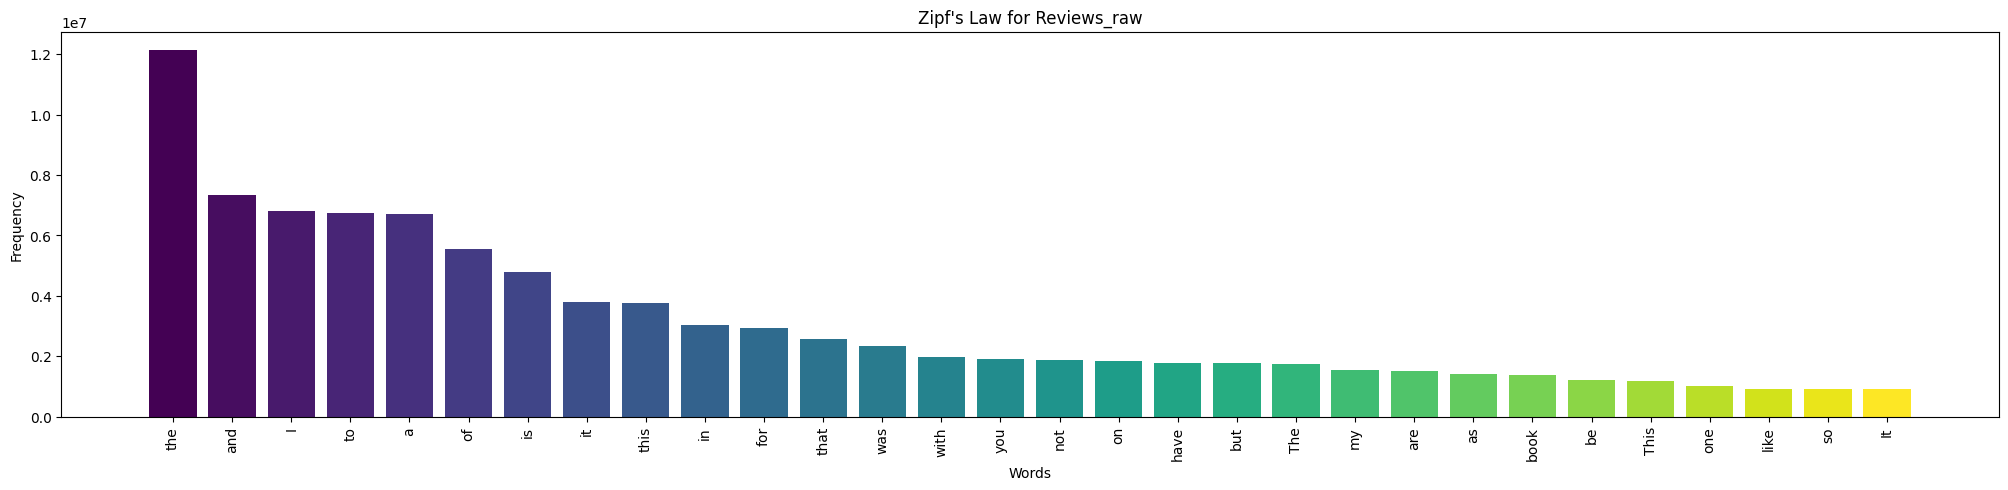

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#TODO: Create bar chart of the 30 most frequent words in positive reviews with appropriate title and axis labels
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(first_tokens_raw)))  # Generate colors for each bar

# Plot the first 30 most frequent words in positive reviews
fig = plt.figure(figsize=(25, 5))
plt.bar(first_tokens_raw.keys(), first_tokens_raw.values(), color=colors)
plt.title("Zipf's Law for Reviews_raw")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

Test

In [ ]:
text = "This hair dryer is terribly bad, it doesn't work at all"  # Raw text
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood_raw, positive_prior, negative_prior)

print(predicted_sentiment)  # Expected: 'negative'
print(sentiment_scores)     # Log scores for positive and negative sentiment


negative
{'positive': -83.14053151850227, 'negative': -79.32639584449296}


In [ ]:
text = "This product was amazing I would buy it again"  # Raw text
predicted_sentiment, sentiment_scores = classify_review_raw(text, likelihood_raw, positive_prior, negative_prior)

print(predicted_sentiment)  # Expected: 'negative'
print(sentiment_scores)     # Log scores for positive and negative sentiment

negative
{'positive': -56.151221219519314, 'negative': -55.76960269323002}


**The reason**

----------------------------------------------------------------

In [ ]:
# Ensure the sum of exponentials of positive log likelihoods is close to 1
assert math.isclose(sum([math.exp(likelihood_raw[word]['positive']) for word in likelihood_raw]), 1, rel_tol=1e-9), "There is probably a bug calculating the positive log likelihood"

# Ensure the sum of exponentials of negative log likelihoods is close to 1
assert math.isclose(sum([math.exp(likelihood_raw[word]['negative']) for word in likelihood_raw]), 1, rel_tol=1e-9), "There is probably a bug calculating the negative log likelihood"

print("Great job! Keep going!")

Great job! Keep going!


In [ ]:
import math

def classify_review_raw_token(text, likelihood, positive_prior, negative_prior):
    """
    Calculates log scores for a new text given some prior probabilities and likelihoods.

    Arguments
    ---------
    text : string
        Text to classify
    likelihood : dictionary
        Dictionary of words and their log likelihood for both positive and negative reviews
    positive_prior : float
        Prior probability of a review being positive (in log form)
    negative_prior : float
        Prior probability of a review being negative (in log form)

    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text ('positive' or 'negative')
    sentiment_scores : dictionary
        Dictionary with the log scores for positive and negative sentiments
    """

    # Tokenize the input text (split into words)
    tokens = text.split()  # This splits the text by spaces. Adjust the tokenization method as needed.

    # Start with the log prior probabilities
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    # Print the log prior probabilities
    print(f"Initial log score (prior): Positive: {log_score_positive:.3f}, Negative: {log_score_negative:.3f}")

    # Calculate the log scores for positive and negative classes
    for token in tokens:
        if token in likelihood:  # If the word is in the vocabulary
            positive_contribution = likelihood[token]['positive']
            negative_contribution = likelihood[token]['negative']

            # Print the token contributions
            print(f"Token '{token}' contributes -> Positive: {positive_contribution:.3f}, Negative: {negative_contribution:.3f}")

            log_score_positive += positive_contribution
            log_score_negative += negative_contribution
        else:
            # If the word is unseen (not in vocabulary), we can ignore or handle it (smoothing could be done here)
            print(f"Token '{token}' is unseen and ignored.")
            pass  # For now, we ignore unseen tokens

    # Store the sentiment scores in a dictionary
    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }

    # Determine the predicted sentiment (the one with the highest score)
    if log_score_positive > log_score_negative:
        predicted_sentiment = 'positive'
    else:
        predicted_sentiment = 'negative'

    return predicted_sentiment, sentiment_scores


In [ ]:
text = "This product was amazing I would buy it again"
predicted_sentiment, sentiment_scores = classify_review_raw_token(text, likelihood_raw, positive_prior, negative_prior)

print(f"\nPredicted Sentiment: {predicted_sentiment}")
print(f"Sentiment Scores: {sentiment_scores}")


Initial log score (prior): Positive: -0.693, Negative: -0.693
Token 'This' contributes -> Positive: -5.354, Negative: -5.603
Token 'product' contributes -> Positive: -7.396, Negative: -6.739
Token 'was' contributes -> Positive: -4.988, Negative: -4.652
Token 'amazing' contributes -> Positive: -8.157, Negative: -9.726
Token 'I' contributes -> Positive: -3.795, Negative: -3.672
Token 'would' contributes -> Positive: -6.114, Negative: -5.699
Token 'buy' contributes -> Positive: -7.107, Negative: -6.505
Token 'it' contributes -> Positive: -4.393, Negative: -4.241
Token 'again' contributes -> Positive: -8.120, Negative: -8.208

Predicted Sentiment: negative
Sentiment Scores: {'positive': -56.117199776288615, 'negative': -55.73809742476881}


For Positive Sentiment: log_score_positive = log_prior_positive + ( contribution of each token ) log_score_positive=log_prior_positive+(contribution of each token) Let’s plug in the values:
log_score_positive=−0.693−5.354−7.396−4.988−8.157−3.795−6.114−7.107−4.393−8.120
log_score_positive = − 56.117199776288615

For Negative Sentiment: log_score_negative = log_prior_negative + ( contribution of each token ) log_score_negative=log_prior_negative+(contribution of each token) Plugging in the values:
log_score_negative = − 0.693 − 5.603 − 6.739 − 4.652 − 9.726 − 3.672 − 5.699 − 6.505 − 4.241 − 8.208 log_score_negative=−55.73809742476881

Final Predicted Sentiment: Predicted Sentiment: Negative Sentiment Scores: {'positive': -56.117, 'negative': -55.738} This process shows how the Naive Bayes classifier sums up the log prior and log likelihoods for each token, comparing the final scores to make a sentiment prediction.

Evaluate

In [ ]:
# Declare the performance metrics globally before the function (only once)
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

def test(df_test, likelihood, positive_prior, negative_prior):
    # Use the global variables without resetting them
    global true_negatives, false_negatives, true_positives, false_positives

    # Iterate over the test dataset
    for index, review in df_test.iterrows():
        true_label = review['label']
        text = review['text']

        # Classify the review using the Naive Bayes classifier
        predicted_sentiment, _ = classify_review_raw(text, likelihood, positive_prior, negative_prior)

        # Convert predicted sentiment to the same format as the label (1 for 'positive', 0 for 'negative')
        predicted_label = 1 if predicted_sentiment == 'positive' else 0

        # Compare true label with predicted label and update metrics
        if predicted_label == 1 and true_label == 1:
            true_positives += 1  # TP
        elif predicted_label == 0 and true_label == 0:
            true_negatives += 1  # TN
        elif predicted_label == 1 and true_label == 0:
            false_positives += 1  # FP
        elif predicted_label == 0 and true_label == 1:
            false_negatives += 1  # FN

    # Calculate Precision, Recall, and F1-Score after processing all the reviews
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score



In [ ]:
# Calculate likelihoods with smoothing factor 0.2
smoothing_factor = 0.2
likelihood_raw = calculate_log_likelihood(full_vocab_raw, positive_vocab_raw, negative_vocab_raw, smoothing_factor)

# Run the test function for raw text classification with smoothing 0.2
Precision_smoothing_0_2, Recall_smoothing_0_2, F1_Score_smoothing_0_2 = test(df_test_raw, likelihood_raw, positive_prior, negative_prior)

# Print the results
print("Precision (Smoothing 0.2): ", Precision_smoothing_0_2)
print("Recall (Smoothing 0.2): ", Recall_smoothing_0_2)
print("F1 Score (Smoothing 0.2): ", F1_Score_smoothing_0_2)


Precision (Smoothing 0.2):  0.8783116392840705
Recall (Smoothing 0.2):  0.8492
F1 Score (Smoothing 0.2):  0.8635105282290764


for smoothing_factors = [0.1,0.3, 0.5]

In [ ]:
# Calculate likelihoods with smoothing factor 0.3
smoothing_factor = 0.3
likelihood_raw = calculate_log_likelihood(full_vocab_raw, positive_vocab_raw, negative_vocab_raw, smoothing_factor)


# smoothing 0.3
Precision_smoothing_0_3, Recall_smoothing_0_3, F1_Score_smoothing_0_3 = test(df_test_raw, likelihood_raw, positive_prior, negative_prior)

# Print the results
print("Precision (Smoothing 0.3): ", Precision_smoothing_0_3)
print("Recall (Smoothing 0.3): ", Recall_smoothing_0_3)
print("F1 Score (Smoothing 0.3): ", F1_Score_smoothing_0_3)

Precision (Smoothing 0.3):  0.8787395179688268
Recall (Smoothing 0.3):  0.8493325
F1 Score (Smoothing 0.3):  0.8637857958287037


In [ ]:
# Calculate likelihoods with smoothing factor 0.5
smoothing_factor = 0.5
likelihood_raw = calculate_log_likelihood(full_vocab_raw, positive_vocab_raw, negative_vocab_raw, smoothing_factor)


# smoothing 0.5
Precision_smoothing_0_5, Recall_smoothing_0_5, F1_Score_smoothing_0_5 = test(df_test_raw, likelihood_raw, positive_prior, negative_prior)

# Print the results
print("Precision (Smoothing 0.5): ", Precision_smoothing_0_5)
print("Recall (Smoothing 0.5): ", Recall_smoothing_0_5)
print("F1 Score (Smoothing 0.5): ", F1_Score_smoothing_0_5)

Precision (Smoothing 0.5):  0.8792674741039707
Recall (Smoothing 0.5):  0.8492683333333333
F1 Score (Smoothing 0.5):  0.864007582687666


In [ ]:
# Calculate likelihoods with smoothing factor 0.1
smoothing_factor = 0.1
likelihood_raw = calculate_log_likelihood(full_vocab_raw, positive_vocab_raw, negative_vocab_raw, smoothing_factor)


# smoothing 0.5
Precision_smoothing_0_1, Recall_smoothing_0_1, F1_Score_smoothing_0_1 = test(df_test_raw, likelihood_raw, positive_prior, negative_prior)

# Print the results
print("Precision (Smoothing 0.1): ", Precision_smoothing_0_1)
print("Recall (Smoothing 0.1): ", Recall_smoothing_0_1)
print("F1 Score (Smoothing 0.1): ", F1_Score_smoothing_0_1)

Precision (Smoothing 0.1):  0.8786195066229063
Recall (Smoothing 0.1):  0.848965
F1 Score (Smoothing 0.1):  0.8635377390576853


In [ ]:
import pandas as pd
smoothing_factors = [0.1, 0.2, 0.3, 0.5]
# Create a table of precision, recall, and F1 score for each smoothing factor
table_data = {
    'Smoothing Factor': smoothing_factors,
    'Precision': [
        Precision_smoothing_0_1,
        Precision_smoothing_0_2,
        Precision_smoothing_0_3,
        Precision_smoothing_0_5
    ],
    'Recall': [
        Recall_smoothing_0_1,
        Recall_smoothing_0_2,
        Recall_smoothing_0_3,
        Recall_smoothing_0_5
    ],
    'F1 Score': [
        F1_Score_smoothing_0_1,
        F1_Score_smoothing_0_2,
        F1_Score_smoothing_0_3,
        F1_Score_smoothing_0_5
    ]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(table_data)

# Sort the DataFrame by 'F1 Score' in descending order
df_sorted = df.sort_values(by='F1 Score', ascending=False)

# Display the sorted table
print(df_sorted)

# Optionally, save the sorted DataFrame to a CSV file
df_sorted.to_csv('sorted_smoothing_factors_metrics.csv', index=False)

   Smoothing Factor  Precision    Recall  F1 Score
3               0.5   0.879267  0.849268  0.864008
2               0.3   0.878740  0.849333  0.863786
0               0.1   0.878620  0.848965  0.863538
1               0.2   0.878312  0.849200  0.863511
